In [ ]:
'''
此算法是错误的，画出来的图像和真实情况不符，仅供参考
原视频：
What Is The Perfect Clock For A Sugar Cane Farm?
https://www.youtube.com/watch?v=um238ebnXOQ
的置顶评论中的算法
'''

from scipy.stats import binom

def efficiency(cycle_length):
    n = 2
    for i in range(0, 16):
        n -= 2 * binom.pmf(i, cycle_length, 3/4096)
    for i in range(16, 32):
        n -= binom.pmf(i, cycle_length, 3/4096)
    return n * 1000000 / cycle_length


for i in range(49240, 49260):
    print(i, efficiency(i))

100%|██████████| 720/720 [00:01<00:00, 389.98it/s]


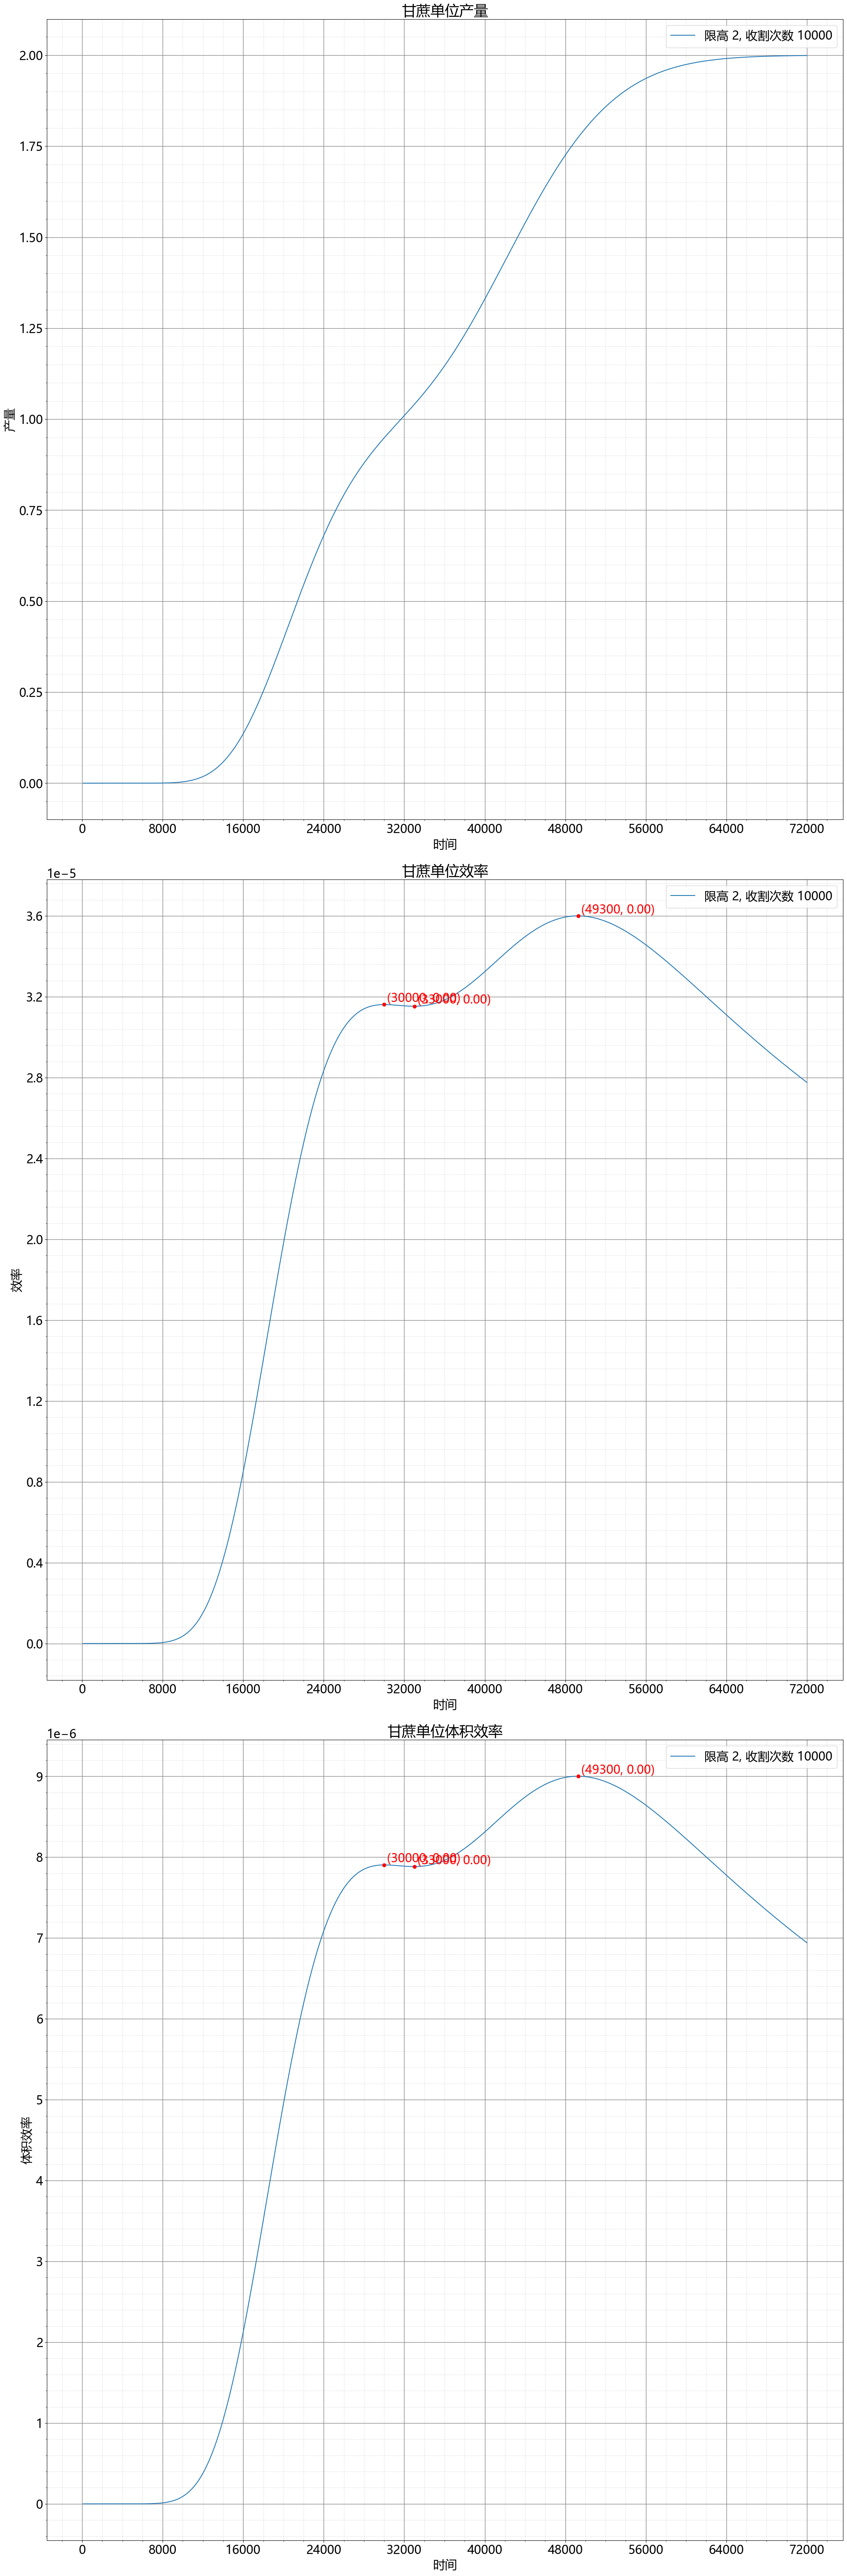

甘蔗的数据图像(二项分布法)(0t).png
数据已导出为“甘蔗的数据表(二项分布法)(收割耗时0t).xlsx”


In [3]:
'''
此算法是错误的，画出来的图像和真实情况不符，仅供参考
'''

import numpy as np #基础库科学运算
import matplotlib.pyplot as plt # 绘图
from matplotlib.ticker import MultipleLocator, MaxNLocator
import pandas as pd # 导出表格
from scipy.stats import binom
from tqdm import tqdm # 进度条

# 1.条件参数
time_array = np.array(range(100,1+72000,100))
limited_height_list = np.array([2]) # 列出想看的限高情况，目前只有甘蔗和仙人掌，输入1,2就行了
harvesting_time = 0 # 收割造成的无法生长的时间，一般是粘性活塞粘液块加二档中继器为4tick；飞行器慢一些，算上往返应该是20tick。
harvest_array = np.array([10000]) # 不关心前几次收割的情况就只输入一万保证收割轮数多收敛就行了

标记图像极值点 = 1 # 填1或0代表是或否
picturePixelSize = 2160
pictureInchSize = picturePixelSize / 100

age_first = 0
age_last = 15
age_count = age_last - age_first + 1

# 2.初始化与计算
产量表 = []
效率表 = []
体积效率表 = []

def product(tick):
    n = limited_height_list[-1]
    for height in limited_height_list:
        n -= height*binom.cdf(height*age_count-1, 3*tick, 1/4096)
    return n

for limited_height in limited_height_list:
    #2.2 遍历计算
    当前限高的产量表 = []
    当前限高的效率表 = []
    当前限高的体积效率表 = []
    for harvested_times in harvest_array:
        当前限高此轮收割的产量表 = []
        当前限高此轮收割的效率表 = []
        当前限高此轮收割的体积效率表 = []
        for t in tqdm(time_array):
            当前限高此轮收割的产量表.append(product2(t))
            当前限高此轮收割的效率表.append(product2(t) / (t + harvesting_time))
            当前限高此轮收割的体积效率表.append(product2(t) / (t + harvesting_time) / (limited_height + 2))
        当前限高的产量表.append(当前限高此轮收割的产量表)
        当前限高的效率表.append(当前限高此轮收割的效率表)
        当前限高的体积效率表.append(当前限高此轮收割的体积效率表)
    产量表.append(当前限高的产量表)
    效率表.append(当前限高的效率表)
    体积效率表.append(当前限高的体积效率表)


#3.1 绘图相关函数

def find_extrema(data, tolerance=1e-16):
    extrema_indices = []
    for i in range(1, len(data) - 1):
        if (data[i] > data[i - 1] + tolerance and data[i] > data[i + 1] + tolerance) or \
           (data[i] < data[i - 1] - tolerance and data[i] < data[i + 1] - tolerance):
            extrema_indices.append(i)
    return extrema_indices

def plot_data(ax, data, current_height, harvested_times, title, ylabel, 此图标记极值点=False):
    # 绘制数据
    ax.plot(time_array, data, label=f'限高 {current_height}, 收割次数 {harvested_times}')

    # 标记极值点
    if 此图标记极值点 and 标记图像极值点:
        extrema_indices = find_extrema(data)
        for idx in extrema_indices:
            ax.scatter(time_array[idx], data[idx], color='red', zorder=5)
            ax.annotate(f'({time_array[idx]}, {data[idx]:.2f})',
                        xy=(time_array[idx], data[idx]),
                        xytext=(5, 5), textcoords='offset points', fontsize= pictureInchSize, color='red')

    ax.set_title(title)
    ax.set_xlabel('时间')
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
    ax.xaxis.set_minor_locator(MaxNLocator(nbins=50))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))
    ax.yaxis.set_minor_locator(MaxNLocator(nbins=50))
    ax.grid(which='major', axis='x', linestyle='-', linewidth=1, color='#888888')
    ax.grid(which='minor', axis='x', linestyle=':', linewidth=0.5, color='#aaaaaa')
    ax.grid(which='major', axis='y', linestyle='-', linewidth=1, color='#888888')
    ax.grid(which='minor', axis='y', linestyle=':', linewidth=0.5, color='#aaaaaa')

# 3.2 画图
plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.rcParams['font.size'] = pictureInchSize  # 字体尺寸
fig, axs = plt.subplots(3, 1, figsize=(pictureInchSize, 3 * pictureInchSize))  # 三行一列的图标

# 3.3.1 绘制产量图
for 当前限高索引, 当前限高 in enumerate(limited_height_list):
    for 收割次数索引, harvested_times in enumerate(harvest_array):
        plot_data(axs[0], 产量表[当前限高索引][收割次数索引], 当前限高, harvested_times, '甘蔗单位产量', '产量', 此图标记极值点=False)

# 3.3.2 绘制效率图
for 当前限高索引, 当前限高 in enumerate(limited_height_list):
    for 收割次数索引, harvested_times in enumerate(harvest_array):
        plot_data(axs[1], 效率表[当前限高索引][收割次数索引], 当前限高, harvested_times, '甘蔗单位效率', '效率', 此图标记极值点=True)

# 3.3.3 绘制体积效率图
for 当前限高索引, 当前限高 in enumerate(limited_height_list):
    for 收割次数索引, harvested_times in enumerate(harvest_array):
        plot_data(axs[2], 体积效率表[当前限高索引][收割次数索引], 当前限高, harvested_times, '甘蔗单位体积效率', '体积效率', 此图标记极值点=True)

# 3.4 绘制图像并导出
plt.tight_layout()
plt.savefig(f'甘蔗的数据图像(二项分布法)({harvesting_time}t).png', dpi=100, bbox_inches='tight')
plt.show()
print(f"甘蔗的数据图像(二项分布法)({harvesting_time}t).png")

#4.1 数据到出到Excel表格
def export_to_excel(sheet_name, data_table, writer):
    # 创建一个列表来存储所有数据
    all_data = []
    
    for i, limited_height in enumerate(limited_height_list):
        # 添加当前限高的时间列，包含限高信息
        time_row = [f'时间(限高：{limited_height})'] + time_array.tolist()  # 每个限高前添加时间列的标题
        all_data.append(time_row)

        # 添加当前限高的收割轮数数据
        for j, harvested_times in enumerate(harvest_array):
            # 创建一行数据，包含收割次数
            row_data = [f'收割{harvested_times}次'] 
            # 添加该限高下的所有时间对应的收割数据
            row_data += [data_table[i][j][idx] for idx in range(len(time_array))]
            all_data.append(row_data)  # 将当前行添加到总数据中
        
        # 添加空行以分隔不同的限高
        empty_row = [''] * len(time_row)  # 确保空行的长度与时间行一致
        all_data.append(empty_row)  # 添加空行

    # 创建 DataFrame 来存储所有数据
    df = pd.DataFrame(all_data)
    
    # 转置 DataFrame
    df = df.T
    
    # 将转置后的 DataFrame 导出到指定的工作表
    df.to_excel(writer, sheet_name=sheet_name, index=False, header=False)

# 使用 ExcelWriter 导出数据
with pd.ExcelWriter(f'甘蔗的数据表(二项分布法)({harvesting_time}t).xlsx', engine='openpyxl') as writer:
    export_to_excel('产量', 产量表, writer)
    export_to_excel('效率', 效率表, writer)
    export_to_excel('体积效率', 体积效率表, writer)  # 确保这里使用正确的数据表变量
    
    # 设置列宽和冻结窗格
    column_width = 16
    for sheet_name in ['产量', '效率', '体积效率']:
        worksheet = writer.sheets[sheet_name]
        
        # 设置列宽
        for column in worksheet.columns:
            column_letter = column[0].column_letter
            worksheet.column_dimensions[column_letter].width = column_width
        
        # 设置冻结窗格，冻结第一行
        worksheet.freeze_panes = 'A2'

print(f"数据已导出为“甘蔗的数据表(二项分布法)(收割耗时{harvesting_time}t).xlsx”")

# 结束
